In [1]:
import requests
from bs4 import BeautifulSoup
from fake_useragent import UserAgent
import pandas as pd
#爬蟲
import matplotlib
import jieba
# 引入文字探勘工具

In [3]:
start=1 # 頁數
end=504 # 頁數
alltitles=[]
allurl=[]
for i in range(start,end+1):
    user_agent=UserAgent()
    # 啟動UserAgent工具
    html = requests.get(url="https://www.ptt.cc/bbs/Shadowverse/index"+str(i)+".html", headers={ 'user-agent': user_agent.random })
    # 模擬隨機使用者打開web的身份,爬蟲網站---我爬ptt的闇影詩章(遊戲)版,取得網站連線
    soup = BeautifulSoup(html.text, 'html.parser') # 把網站變成html格式
    titles = soup.find_all(attrs={"class":"title"}) #搜尋器
    for title in titles:
        #print(title.text.strip())
        #print(title.select_one("a").get("href"))
        alltitles.append(title.text.strip()) #取得標題
        allurl.append("ptt.cc"+title.select_one("a").get("href")) #取得觀看數&留言
print(allurl)
# 爬蟲中

['ptt.cc/bbs/Shadowverse/M.1480424212.A.964.html', 'ptt.cc/bbs/Shadowverse/M.1480424362.A.7BD.html', 'ptt.cc/bbs/Shadowverse/M.1480424393.A.BE0.html', 'ptt.cc/bbs/Shadowverse/M.1480424431.A.DD7.html', 'ptt.cc/bbs/Shadowverse/M.1480424511.A.480.html', 'ptt.cc/bbs/Shadowverse/M.1480424651.A.282.html', 'ptt.cc/bbs/Shadowverse/M.1480424652.A.F15.html', 'ptt.cc/bbs/Shadowverse/M.1480424760.A.3E5.html', 'ptt.cc/bbs/Shadowverse/M.1480424883.A.FF6.html', 'ptt.cc/bbs/Shadowverse/M.1480424920.A.158.html', 'ptt.cc/bbs/Shadowverse/M.1480425212.A.E1B.html', 'ptt.cc/bbs/Shadowverse/M.1480425574.A.AE1.html', 'ptt.cc/bbs/Shadowverse/M.1480425674.A.469.html', 'ptt.cc/bbs/Shadowverse/M.1480425903.A.986.html', 'ptt.cc/bbs/Shadowverse/M.1480426074.A.5BD.html', 'ptt.cc/bbs/Shadowverse/M.1480426104.A.F03.html', 'ptt.cc/bbs/Shadowverse/M.1480426121.A.CFE.html', 'ptt.cc/bbs/Shadowverse/M.1480426256.A.018.html', 'ptt.cc/bbs/Shadowverse/M.1480426308.A.20C.html', 'ptt.cc/bbs/Shadowverse/M.1480426410.A.BA7.html',

In [6]:
df = pd.DataFrame(
{
    'title': alltitles,
    'links': allurl
})
df
# 取得的資料

,title,links
0,[公告] 開版試閱 Shadowverse,ptt.cc/bbs/Shadowverse/M.1480424212.A.964.html
1,恭喜開板,ptt.cc/bbs/Shadowverse/M.1480424362.A.7BD.html
2,[恭喜] 恭喜開版,ptt.cc/bbs/Shadowverse/M.1480424393.A.BE0.html
3,[閒聊] 恭喜開板,ptt.cc/bbs/Shadowverse/M.1480424431.A.DD7.html
4,恭喜開版,ptt.cc/bbs/Shadowverse/M.1480424511.A.480.html
...,...,...
9965,[情報] CDB指定杯,ptt.cc/bbs/Shadowverse/M.1667893943.A.63A.html
9966,Fw: [公告] 關於利用網路擄人、囚禁等議題請板主宣導,ptt.cc/bbs/Shadowverse/M.1667986845.A.93B.html
9967,[公告] 板規2.4 &檢舉區,ptt.cc/bbs/Shadowverse/M.1497267067.A.40F.html
9968,[公告] 置底抱怨區,ptt.cc/bbs/Shadowverse/M.1533857805.A.74B.html


In [41]:
str=''.join(alltitles) #把alltitles轉成string,以進行文字格式處理
cleanstr=str.replace('[^\w\s]','').replace('／','').replace('《','').replace('》','').replace('，','').replace('。','').replace('「','').replace('」','').replace('(','').replace(')','').replace('！','').replace('？','').replace('、','').replace('…','').replace(':','').replace("[",'').replace("]",'').replace("~",'')
#把換成槱點空格
cleanstr=cleanstr.replace(" ",'') #把空格刪除
print(cleanstr)
# 清理資料的雜質

公告開版試閱Shadowverse恭喜開板恭喜恭喜開版閒聊恭喜開板恭喜開版閒聊恭喜開板閒聊恭喜開板閒聊恭喜開版閒聊恭喜開版閒聊恭喜開板閒聊恭喜開版閒聊恭喜開版討論恭喜開版公告板規1e公告11月月底閒聊區閒聊恭喜開版Fw閒聊Shadowverse比賽宅男奪冠卻拿不到獎金公告置底約戰區已廢除閒聊恭喜開版閒聊恭喜開板討論置底懶人連結區閒聊恭喜開板啊閒聊叮咚叮咚～FwR閒聊Shadowverse比賽宅男奪冠卻拿不到獎金恭喜開版公告徵求板務人員協助管理板務閒聊恭喜開版情報新卡包RiseofBahamut未證實閒聊連咆龍閒聊恭喜開版閒聊恭喜開版要不要建議把一些西恰文轉來恭喜開版囉來玩吸血鬼窩閒聊恭喜開版公告關於恭喜開板文Re閒聊Shadowverse比賽宅男奪冠卻拿不到獎金閒聊賀賀賀賀賀狂賀!!開版大吉!!心得競技場2-PICK選牌原則Re閒聊恭喜開版閒聊恭喜開版恭喜恭喜開版O_O閒聊開版祝賀閒聊恭喜開版閒聊恭喜開版閒聊恭喜開版心得轉610勝上M臉龍心得閒聊恭喜開版啊～閒聊恭喜開版Re心得競技場2-PICK選牌原則閒聊恭賀開版閒聊恭喜開版閒聊恭喜開版閒聊恭喜開版Re心得競技場2-PICK選牌原則閒聊恭喜開版情報關於一些新手可能會漏掉的知識閒聊恭喜開版閒聊恭喜開板心得吸血鬼古城Re心得吸血鬼古城Re心得吸血鬼古城閒聊恭喜開板問題完全不用留的牌有哪些閒聊恭喜開版問題實況主推薦Fw討論Shadowverse套牌C/P值公告恭喜開板文與自介文自介Senkanseiki自介steven6105自介lucifier自介kaisudo0520Re心得吸血鬼古城自介yyh121日版心得總算爬到Master自介harrychang自介kevin0925x自介yam276實況靠臉的混合超越雪人法電台收播統整中立卡牌資料庫－銅銀統整中立卡牌資料庫－金虹自介badend8769討論主教這情況你會怎麼下呢問題旗皇的剋星問題主教的組牌建議自介p21077心得快攻吸血鬼的組成閒聊本體是帽子的肌肉男好強!順便試刀自介NowakiKai自介boinslime自介wen17討論關於未來活動的走向實況中速精靈衝MnowAA1offRe情報新卡包RiseofBahamut心得稍微整理一下目前常見的牌組Re情報新卡包RiseofBahamut心得各式皇家牌組簡易使用心得ByReqNy阿賢公告12月置底閒聊區第一篇Re情

In [42]:
jieba.setLogLevel(20)

In [43]:
word = jieba.cut(cleanstr, cut_all=False) # 啟動jieba功能
print('精確模式'+": " + "/".join(word)+ '\n')  

精確模式: 公告/開版/試閱/Shadowverse/恭喜/開板/恭喜/恭喜/開版/閒聊/恭喜/開板/恭喜/開版/閒聊/恭喜/開板/閒聊/恭喜/開板/閒聊/恭喜/開版/閒聊/恭喜/開版/閒聊/恭喜/開板/閒聊/恭喜/開版/閒聊/恭喜/開版/討論/恭喜/開版/公告/板規/1e/公告/11/月/月底/閒聊區/閒聊/恭喜/開版/Fw/閒聊/Shadowverse/比賽/宅/男奪冠/卻/拿/不到/獎金/公告/置底/約/戰區/已/廢除/閒聊/恭喜/開版/閒聊/恭喜/開板/討論/置底/懶人連/結區/閒聊/恭喜/開板/啊/閒聊/叮咚/叮咚/～/FwR/閒聊/Shadowverse/比賽/宅/男奪冠/卻/拿/不到/獎金/恭喜/開版/公告/徵求/板務人員/協助/管理/板務閒/聊/恭喜/開版/情報/新卡包/RiseofBahamut/未證/實閒/聊連/咆龍/閒聊/恭喜/開版/閒聊/恭喜/開版要/不要/建議/把/一些/西恰文/轉來/恭喜/開版/囉/來/玩/吸血鬼/窩/閒聊/恭喜/開版/公告/關於/恭喜/開板文/Re/閒聊/Shadowverse/比賽/宅/男奪冠/卻/拿/不到/獎金閒/聊賀/賀賀/賀賀/狂賀/!/!/開版/大吉/!/!/心得/競技場/2/-/PICK/選牌/原則/Re/閒聊/恭喜/開版/閒聊/恭喜/開版/恭喜/恭喜/開版/O/_/O/閒聊/開版祝/賀閒聊/恭喜/開版/閒聊/恭喜/開版/閒聊/恭喜/開版/心得/轉/610/勝上/M/臉龍/心得/閒聊/恭喜/開版/啊/～/閒聊/恭喜/開版/Re/心得/競技場/2/-/PICK/選牌/原則/閒聊/恭賀/開版/閒聊/恭喜/開版/閒聊/恭喜/開版/閒聊/恭喜/開版/Re/心得/競技場/2/-/PICK/選牌/原則/閒聊/恭喜/開版情/報關/於/一些/新手/可能/會/漏掉/的/知識/閒聊/恭喜/開版/閒聊/恭喜/開板/心得/吸血鬼/古城/Re/心得/吸血鬼/古城/Re/心得/吸血鬼/古城/閒聊/恭喜/開板/問題/完全/不用/留/的/牌/有/哪些/閒聊/恭喜/開版/問題/實況/主推/薦/Fw/討論/Shadowverse/套牌/C///P/值/公告/恭喜/開板文/與/自/介文/自介/Senkanseiki/自介/steven6105/自介/lucifier/自介/kaisudo0520Re/心得/吸血鬼/古城/自介/yyh121/日版/

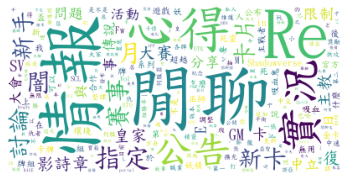

<Figure size 4000x2000 with 0 Axes>

In [63]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
# 引入工具
Sentence = jieba.cut_for_search(cleanstr) # 使用cut_for_search(搜尋引擎)斷詞模式並產生字詞頻率的dictionary
text=' '.join(Sentence) #把sentence轉成string
stopwords = {}.fromkeys(["也","但","來","個","再","的","和","是","有","更","會","可能","有何","從","對","就", '\n','越','為','這種','多','越來',' ',"請問","請","了","嗎","報","無"])
# 把常用字刪除
wordcloud = WordCloud(font_path="C:/Windows/Fonts/kaiu.ttf", #設置字體
               background_color="white", #背景顏色
               max_words = 2000 ,        #文字雲顯示最大詞數
               stopwords=stopwords,       #停用字詞
               collocations=False)       #防止重覆字
wordcloud.generate_from_text(text)
 
# 視覺化呈現
plt.imshow(wordcloud)
plt.axis("off")
plt.figure(figsize=(20,10), dpi =200)
plt.show()